<a href="https://colab.research.google.com/github/LeandroVives/UNSAM_IA/blob/master/Recuperatorio_1_2020_Vives_Solucion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
from scipy.stats import binom, beta, uniform, norm, bernoulli, dirichlet
import matplotlib.pyplot as plt

%matplotlib inline

### Ejercicio 1: Probabilidad e Inferencia Bayesiana

Se cuenta con un detector que puede medir tres tipos de particulas: electrones, muones y tauones. El aparato solo informa de la detección de una partícula, pero no sobre el tipo de partícula de la cual se trata. Además, para cada tipo de partícula, el detector tiene una eficiencia diferente. Es decir, que el aparato no detecta _todas_ las partículas que le llegan, sino solo una fracción de ellas y esa fracción depende del tipo de partícula.

Ante la llegada de una partícula al detector, la eficiencia puede verse como una probabilidad de exito de medicion $p_i$ para cada tipo de particula, con $i = \{\text{electrón, muón, tauón}\}$.

**a.** ¿Cuál son los posibles resultados de una medición única con el detector? ¿Puede relacionar estos resultados con el espacio de muestreo de un experimento? Describa cómo sería el experimento en cuestión.

**a) Los resultados posibles de una medición única son dos: que el detector efectivamente detecte la partícula o que no la detecte, ya que es lo único que informa. El espacio de muestreo de un experimento es binario y podría ser 0 para la no detección con probabilidad P(0) y 1 para la detección con P(1) = eficiencia. Un experimento es lanzar una cantidad N de partículas y ver cuántas efectivamente detectó, a modo de estimar la eficiencia. Con esa probabilidad de éxito uno puede calcular luego la probabilidad de obtener n detecciones dados N arribos de un tipo de partícula. A su vez, conociendo las eficiencias de cada clase, dada la detección de una partícula, se podría estimar cuál es la probabilidad de que sea de cada clase.**

Se desea realizar la carecterización del detector. Es decir, obtener información sobre su funcionamineto. En otras palabras, se busca determinar la eficiencia para cada clase de partículas. 

Para esto se realizó una serie de mediciones pero no se procesaron los datos. El experimento consistió en hacer llegar una serie de partículas de tipo conocido al detector y contar en cuantas ocasiones el aparato registraba una medición. Suponga que la interacción con cada partícula es independiente de las demás.

Los datos se encuentran en el archivo `datos_ej1.csv`, que puede leerse con `pandas`. Las columnas indican el tipo de partícula y si fue detectada o no por el instrumento. 

**b.** Lea los datos con la celda de abajo y describa un poco de qué se tratan (número de mediciones de cada tipo, etc.)

In [0]:
import pandas as pd
df = pd.read_csv('datos_ej1.csv', header=0)

In [0]:
# Convierto el frame de pandas a un np.array
detecciones=df.to_numpy()
print(detecciones[:20,:])

[['muon' 1]
 ['tau' 1]
 ['tau' 1]
 ['tau' 0]
 ['muon' 0]
 ['muon' 1]
 ['muon' 1]
 ['tau' 0]
 ['electron' 0]
 ['tau' 1]
 ['electron' 0]
 ['electron' 1]
 ['electron' 0]
 ['muon' 0]
 ['tau' 0]
 ['muon' 1]
 ['muon' 0]
 ['muon' 1]
 ['tau' 0]
 ['tau' 0]]


In [0]:
# Cuento la cantidad total de partículas de cada clase que llegaron al 
# detector y la cantidad que fue detectada por clase.

Ne=0 #cantidad de electrones total que llegaron al detector.
ne=0 #cantidad de electrones que fueron detectados.
Nm=0 #cantidad de muones total que llegaron al detector.
nm=0 #cantidad de muones que fueron detectados.
Nt=0 #cantidad de tauones total que llegaron al detector.
nt=0 #cantidad de tauones que fueron detectados.

for i in range(0, len(detecciones[:,0])):
  if detecciones[i,0] == 'electron':
    Ne +=1
    if detecciones[i,1] == 1:
      ne +=1
  else:
    if detecciones[i,0] == 'muon':
      Nm +=1
      if detecciones[i,1] == 1:
        nm +=1
    else:
      Nt += 1
      if detecciones[i,1] == 1:
        nt +=1

print("Llegaron al detector %d electrones y se detectaron sólo %8.3f" % (Ne,ne))
print("Llegaron al detector %d muones y se detectaron sólo %8.3f" % (Nm,nm))
print("Llegaron al detector %d tauones y se detectaron sólo %8.3f" % (Nt,nt))

Llegaron al detector 173 electrones y se detectaron sólo  123.000
Llegaron al detector 162 muones y se detectaron sólo  119.000
Llegaron al detector 165 tauones y se detectaron sólo   85.000


**c.** ¿Cuál es la función de verosimilitud que mejor describe el problema para cada tipo de partícula? **Justifique**

**La función de verosimilitud que mejor describe el problema para cada partícula es una binominal, dado que tengo una cantidad de eventos N, que en este caso sería la cantidad total de partículas de cada clase que llegaron al detector, y n cantidad de partículas de cada clase que fueron detectadas con una probabilidad de éxito de detección p de acuerdo a cada clase (eficiencia de cada tipo de partículas).**

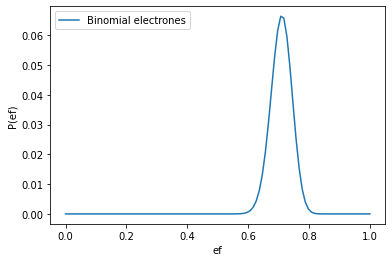

In [0]:
# Ejemplo de verosimilitud para el caso de los electrones.
ef = np.linspace(0,1,100)
bine = binom.pmf(ne,Ne,ef)
plt.plot(mu,bine, label='Binomial electrones')
plt.legend()
plt.xlabel(r'ef')
plt.ylabel(r'P(ef)')
plt.show()

**d.** Calcule el estimador de máxima verosimilitud para la eficiencia de cada tipo de partículas.

**El estimador de máxima verosimilitud es la cantidad de partículas detectadas de una clase dividido la cantidad total de partículas de esa clase que llegaron al detector. Llamo a esa probabilidad de exito para cada tipo de partículas i como pi**

In [0]:
pe=ne/Ne
pm=nm/Nm
pt=nt/Nt
print(pe,pm,pt)

0.7109826589595376 0.7345679012345679 0.5151515151515151


**e.** Suponiendo que antes de la medición no se cuenta con ninguna información acerca de la eficiencia del detector, determine la distribución posterior de cada $p_i$ tras la medición. 

*Ayuda*: tome a cada partícula como un problema independiente.

¿De qué manera le conviene tomar la distribución prior para simplificar el problema?

**Conviene considerar a cada distribución prior como una uniforme ya que no poseo información previa de cómo es dicha distribución. Es decir, que el prior es simplemente 1.**

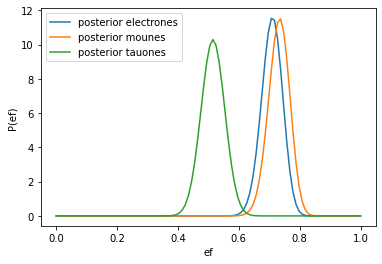

In [0]:
ef = np.linspace(0,1,100)
prior = 1

# Escribo todas las fórmulas con el prior simplemente para que se entienda el 
# procedimiento.

bine = binom.pmf(ne,Ne,ef)
evidencia_e = (bine*prior).sum()*(ef[1]-ef[0])
pose = bine/evidencia_e

binm = binom.pmf(nm,Nm,ef)
evidencia_m = (binm*prior).sum()*(ef[1]-ef[0])
posm = binm/evidencia_m

bint = binom.pmf(nt,Nt,ef)
evidencia_t = (bint*prior).sum()*(ef[1]-ef[0])
post = bint/evidencia_t

plt.plot(mu,pose, label='posterior electrones')
plt.plot(mu,posm, label='posterior mounes')
plt.plot(mu,post, label='posterior tauones')
plt.legend()
plt.xlabel(r'ef')
plt.ylabel(r'P(ef)')
plt.show()

**f.** ¿Cómo cambia la respuesta anterior si en lugar de no contar con información previa al experimento, el constructor proveyera la siguiente información:

"El detector cuenta con una eficiencia de 75%, determinada con un error del 5%, idéntica para cada clase".

No hace falta que haga las cuentas, solo indique cómo cambia la resolución del punto **d**.

**En este caso debería repetir todos los cálculos de los posteriores considerando que el prior para cada clase es una distribución normal para la eficiencia donde prior es N(0.5; 0.05).**

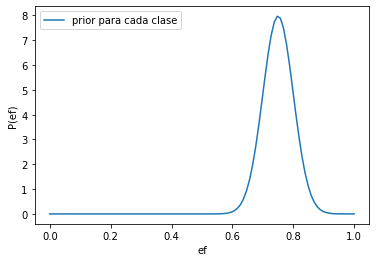

In [0]:
# Este sería el prior

prior = norm.pdf(ef,0.75,0.05)
plt.plot(ef,prior, label='prior para cada clase')
plt.legend()
plt.xlabel(r'ef')
plt.ylabel(r'P(ef)')
plt.show()


**g.** Luego de caracterizado, el detector mide la llegada de una particula. ¿Qué puede decir de la probabilidad de cada uno de los tipos de partículas?

*Ayuda*: Para resolver el problema necesitará la eficiencia de detección para cada tipo de partícula. Puede utilizar el estimador de máxima verosimilitud que calculó en el inciso **d.**

**Tengo que calcular cuál es la probabilidad de que, dado que el detector detectó una partícula, ésta sea un Electrón, un Muón o un Tauón, es decir P(tipo de partícula| detectó una partícula). La P(detectar una partícula| tipo de partícula) es un vector con las eficiencias, calculadas con el estimador de máxima verosimilitud. Como no tengo información sobre el porcentaje de partículas de cada tipo que llegan considero que cada tipo llega con igual probabilidad, o sea 1/3. Utilizando la regla de Bayes encuentro la probabilidad buscada.**

In [0]:
Veroparticulas = np.array([pe, pm, pt])
prior= 1/3
Postparticulas = Veroparticulas*prior/(Veroparticulas*prior).sum()
print("La probabilidad de que habiendo detectado una partícula, ésta sea un electrón es: %8.3f" % (100*Postparticulas[0]))
print("La probabilidad de que habiendo detectado una partícula, ésta sea un muón es: %8.3f" % (100*Postparticulas[1]))
print("La probabilidad de que habiendo detectado una partícula, ésta sea un Tuaón es: %8.3f" % (100*Postparticulas[2]))

La probabilidad de que habiendo detectado una partícula, ésta sea un electrón es:   36.262
La probabilidad de que habiendo detectado una partícula, ésta sea un muón es:   37.465
La probabilidad de que habiendo detectado una partícula, ésta sea un Tuaón es:   26.274


**h.** Llega al detector una partícula originada en una lluvia de la siguiente composición: 50% electrones, 10% muones, 25% tauones, 15% taquiones (para los cuales el detector es completamente insensible). ¿Cuál es la probabilidad de que el aparato indique una detección?

*Ayuda*: Al igual que en el inciso anterior, para resolver el problema necesitará la eficiencia de detección para cada tipo de partícula. Puede utilizar el estimador de máxima verosimilitud que calculó en el inciso **d.**

**Ahora tengo como dato la probabilidad de que llegue una partícula de cada tipo (los voy a denominar con mayúsculas para que no se confunda con cómo llamé a la eficiencia). Entonces son PE= 0.5, PM= 0.1, PT= 0.25, PTAC= 0.15. Para saber cuál es la probabilidad de que el aparato indique una detección, debo hacer la sumatoria sobre cada tipo de partícula del producto de P(de una detección|clase de partícula) x P(llegada de cada partícula).**

In [0]:
ptac=0 #porque el detector es insensible a los Taquiones.
PE=0.5
PM=0.1
PT=0.25
PTAC=0.15
Px1=pe*PE+pm*PM+pt*PT+ptac*PTAC
print("La probabilidad de detección de una partícula es: %8.3f"%Px1)

La probabilidad de detección de una partícula es:    0.558


**i (OPTATIVO).** Vuelva a realizar el cálculo de los puntos **g** y **h** considerando la distribución posterior completa. Compare sus conclusiones con los puntos anteriores.

*Ayuda*: Para esto, necesitará realizar una marginalización sobre el parámetro de eficiencia, para obtener la probabilidad posterior de obtener una detección, dada una clase de partícula $i$.

In [0]:
Veroparticulas = np.array([pe, pm, pt, ptac])
prior= np.array([PE, PM, PT, PTAC])
Postparticulas = Veroparticulas*prior/Px1
print("La probabilidad de que habiendo detectado una partícula, ésta sea un electrón es: %8.3f" % (100*Postparticulas[0]))
print("La probabilidad de que habiendo detectado una partícula, ésta sea un muón es: %8.3f" % (100*Postparticulas[1]))
print("La probabilidad de que habiendo detectado una partícula, ésta sea un Tuaón es: %8.3f" % (100*Postparticulas[2]))
print("La probabilidad de que habiendo detectado una partícula, ésta sea un Taquión es: %8.3f" % (100*Postparticulas[3]))

La probabilidad de que habiendo detectado una partícula, ésta sea un electrón es:   63.738
La probabilidad de que habiendo detectado una partícula, ésta sea un muón es:   13.171
La probabilidad de que habiendo detectado una partícula, ésta sea un Tuaón es:   23.091
La probabilidad de que habiendo detectado una partícula, ésta sea un Taquión es:    0.000


**En este caso, el conocer cuál es la probabilidad de llegada de cada partícula modifica la probabilidad de que dada la detección de una partícula sea de alguna de las clases expresadas.**

****

### Ejercicio 2: Modelos Lineales para Regresión

En su laboratorio han adquirido, con costo millonario, un nuevo *criptómetro*. Los turnos para utilizarlo enseguida comienzan a acabarse, ya que todos quieren hacerse manos de él por unos momentos. En este escenario, en una serie de mediciones realizadas con el *criptómetro* se encuentra una correlación entre la propiedad $X$ de un material y su cripticidad $y$. 

Una búsqueda rápida en la literatura especializada muestra que hay muy poco documentado sobre tal correlación. Todo parece indicar que llevaría años de trabajo e inversión desarrollar un modelo realista que la explique. 
Pero como $X$ es muy fácil de medir, Ud. piensa que podría explotar esta relación para construir un *criptómetro* económico. Este permitiría estimar la *cripticidad* $y$ de un material de una manera sencilla y eficaz, con un costo reducido. Se dispone entonces a encontrar un modelo que pueda predecir $y$ a partir de $X$ con el menor error posible, a fin de desarrollar el *criptómetro* de bajo costo.

Las mediciones que ha encontrado para la cripticidad $y$ en función de $X$ son las siguientes

In [0]:
X = np.array([0.00000000e+00, 4.15893378e-03, 1.66357351e-02, 3.74304040e-02,
       6.65429404e-02, 1.03973344e-01, 1.49721616e-01, 2.03787755e-01,
       2.66171762e-01, 3.36873636e-01, 4.15893378e-01, 5.03230987e-01,
       5.98886464e-01, 7.02859808e-01, 8.15151020e-01, 9.35760100e-01,
       1.06468705e+00, 1.20193186e+00, 1.34749454e+00, 1.50137509e+00,
       1.66357351e+00, 1.83408980e+00, 2.01292395e+00, 2.20007597e+00,
       2.39554586e+00, 2.59933361e+00, 2.81143923e+00, 3.03186272e+00,
       3.26060408e+00, 3.49766331e+00, 3.74304040e+00, 3.99673536e+00,
       4.25874819e+00, 4.52907888e+00, 4.80772745e+00, 5.09469388e+00,
       5.38997818e+00, 5.69358034e+00, 6.00550037e+00, 6.32573828e+00,
       6.65429404e+00, 6.99116768e+00, 7.33635918e+00, 7.68986855e+00,
       8.05169579e+00, 8.42184090e+00, 8.80030387e+00, 9.18708471e+00,
       9.58218342e+00, 9.98560000e+00]).reshape(-1,1)
y = np.array([ 2.34658081,  0.12232961,  3.28408066,  6.50202338,  1.11491047,
        1.65815688,  7.46238396,  5.5879876 ,  2.81212403,  6.00471259,
        4.07938942,  4.67934907,  6.86236068,  2.68607344,  3.74378497,
        6.74267086,  6.4138967 ,  9.54710971,  7.83545878,  7.58260975,
       13.31941341, 11.02803986, 12.15464143, 10.30918401, 12.19094142,
       13.50273522, 11.73650991, 13.979756  , 12.43200611, 12.65491575,
       11.96171543, 14.94378399, 12.13494977, 10.47716903, 12.54112238,
        9.69890304, 11.14506196,  8.28167544,  8.76715857, 10.24728082,
       10.57023985,  9.65935661,  9.0763293 ,  8.61455788,  7.12765358,
        7.66762068,  7.67915514,  8.93185613,  7.95844691,  5.66816807])

**a.** Grafique los datos obtenidos.

**b.** Separe 20% de los datos para usar como conjunto de testeo. Los datos están repartidos de forma aleatoria.
A partir de este punto, trabaje solamente con el conjunto de entrenamiento.

**c.** Para tener un baseline con qué comparar, decide ajustar una parábola a los datos.

* *i.* Encuentre los parámetros de este modelo.

* *ii.* Grafique sobre los datos de entrenamiento la predicción del modelo, y calcule el RMSE sobre ellos.

* *iii.* Estime el error que espera obtener sobre datos que no ha visto anteriormente. Recuerde: No utilice los datos de testeo.

**d.** Decidido a encontrar un mejor ajuste, desea probar con polinomios de grado mayor. Encuentre el grado polinomial óptimo, y calcule el error (RMSE) que espera obtener sobre datos no vistos anteriormente. Justifique su elección, por ejemplo con un gráfico. (Recuerde: No utilice el conjunto de testeo)

**f.** Ya está bastante satisfecho con su modelo, pero antes de tomar una descisión, decide probar modelos de regresión polinomial regularizados. Encuentre simultáneamente el grado óptimo polinomial $M$ y el parámetro de regularización $\alpha$ para un modelo Ridge. Calcule el error (RMSE) que espera obtener sobre datos que no ha visto anteriormente. (Recuerde: No utilice el conjunto de testeo). Puede probar con valores de $M\in[1,20]$ y $\alpha\in[10^{-2}, 1]$.

**g.** Ya habiendo desarrollado un buen modelo predictivo, decide reportarlo junto a una estimación objetiva y sin bias del error que espera obtener. Para esto, de todos los modelos probados anteriormente elija el óptimo. y entrénelo sobre el todo el conjunto de Train. Luego calcule la performance (RMSE) sobre el conjunto de test.

**g.** Para una aplicación específica, le piden que calcule la *cripticidad* $y$ para una medición de $X=4.7$. Calcula la predicción de su modelo. ¿Qué error espera que tenga esta predicción? ¿Porqué?

A continuación, le piden que calcule la *cripticidad* de una muestra con $X=20$. ¿Cómo cambian las respuestas anteriores?



**h (OPTATIVO).** El desarrollo del criptómetro parece prometedor. Sin embargo, usted recuerda de sus clases de inferencia Bayesiana que para tener un completo control sobre los parámetros de un modelo uno debería conocer el posterior del mismo. Un fin de semana lluvioso, decide calcular la distribución posterior de los parámetros de su mejor modelo.

* Calcule el posterior de los parametros $w$ de su modelo, asumiendo que las variables $y$ están normalmente distribuídas con una precisión $\beta = 1$. Plotee el posterior como función de cada $w$ (o al menos, alguno), marginalizando en el resto. **Ayuda**: Dada una multinormal $\mathcal{N} (\vec{w} | \vec{m}, S)$, marginalizar en todas las variables menos $w_i$ da como resultado una normal con media $m_i$ y varianza $S_{i,i}$: $\mathcal{N}(w_i |\mu = m_i, \sigma^2 = S_{i,i})$.

* Calcule la distribución predictiva posterior de la *cripticidad*, teniendo en cuenta los datos del conjunto de entrenamiento. Grafíquela junto con los datos de entrenamiento. Comente sobre el comportamiento de la misma.